In [1]:
import pandas as pd
from pandas import DataFrame 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import scipy.stats as stats
import pylab
import seaborn as sns

# Read the file & Print head and tail of data frame

In [2]:
df = pd.read_csv('HY_Universe_corporate bond.csv')
print(df.head())
print(df.tail()) 

       CUSIP  Ticker  Issue Date    Maturity 1st Call Date Moodys S_and_P  \
0  000324AA1  FLECIN    7/1/2014    7/1/2019    10/23/2017    Nan     Nan   
1  00080QAB1     RBS   3/15/2004    6/4/2018           Nan    Ba1     BB+   
2  00081TAD0    ACCO   5/14/2010   3/15/2015           Nan     WR      NR   
3  00081TAH1    ACCO   6/17/2013   4/30/2020           Nan     WR      NR   
4  00081TAJ7    ACCO  12/22/2016  12/15/2024    12/15/2019     B1     BB-   

  Fitch Bloomberg Composite Rating  Coupon  ...  percent_intra_dealer  \
0   Nan                        Nan   12.00  ...              0.006645   
1   BBB                        BB+    4.65  ...              0.425018   
2   BB+                         NR   10.63  ...              0.115207   
3    WD                         NR    6.75  ...              0.426332   
4    BB                        BB-    5.25  ...              0.157216   

  percent_uncapped bond_type  Client_Trade_Percentage weekly_mean_volume  \
0         0.292359    

# Print summary of data frame

In [3]:
print('Rows:', len(df))
print('Columns:',len(df.columns))
summary = df.describe()
print(summary)

Rows: 2721
Columns: 37
            Coupon  Issued Amount  Maturity At Issue months  LiquidityScore  \
count  2721.000000   2.721000e+03               2721.000000     2721.000000   
mean     10.307872   8.299295e+08                113.968997       18.218230   
std      63.051382   5.802790e+08                101.893176        7.872071   
min       0.000000   3.700000e+08                 11.930000        4.388758   
25%       5.000000   5.000000e+08                 65.170000       12.738630   
50%       6.250000   6.500000e+08                 97.370000       16.538471   
75%       7.750000   1.000000e+09                121.770000       22.120108   
max     999.000000   7.364026e+09               1217.570000       54.673908   

         LIQ SCORE      n_trades  volume_trades  total_median_size  \
count  2721.000000   2721.000000   2.721000e+03       2.721000e+03   
mean      0.182182   2700.696435   7.222372e+08       5.361476e+05   
std       0.078721   5572.262205   1.027825e+09       4

# Scatter plots

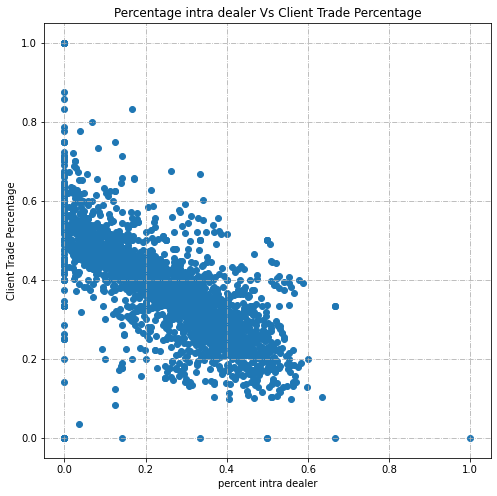

In [4]:
#Percentage intra dealer Vs Client TradePercentage
plt.figure(figsize = (8, 8))
plt.grid(True,linestyle='-.')
plt.xlabel('percent intra dealer')
plt.ylabel('Client Trade Percentage')
plt.title('Percentage intra dealer Vs Client Trade Percentage')
_ = plt.scatter(df['percent_intra_dealer'],df['Client_Trade_Percentage'])

A nagative linear relationship seems to exist between Percentage intra dealer and Client TradePercentage.

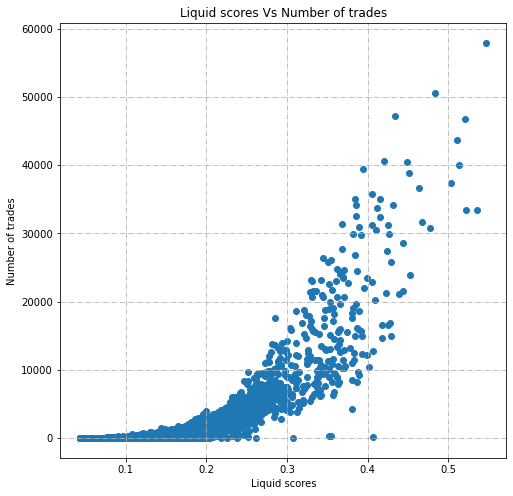

In [5]:
#Liquid scores vs Number of trades
plt.figure(figsize = (8, 8))
plt.grid(True, linestyle = '-.')
plt.xlabel('Liquid scores')
plt.ylabel('Number of trades')
plt.title('Liquid scores Vs Number of trades')
_ = plt.scatter(df['LIQ SCORE'], df['n_trades'])

A Quadratic Relationship seems to exist between Liquid scores vs Number of trades.

# QQ plot

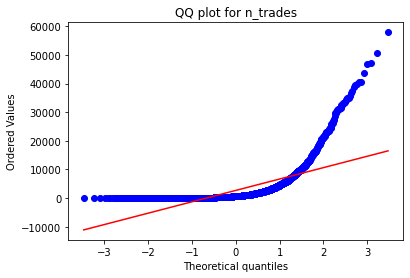

In [6]:
stats.probplot(df['n_trades'], dist = 'norm', plot = pylab)
plt.title('QQ plot for n_trades')
pylab.show()

Clearly, n_trades is not normally distributed.

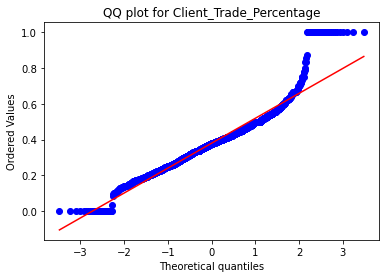

In [7]:
stats.probplot(df['Client_Trade_Percentage'], dist = 'norm', plot = pylab)
plt.title('QQ plot for Client_Trade_Percentage')
pylab.show()

It seems that for Client_Trade_Percentage, normal distribution fits pretty well between +- 2 quantiles, but not for the extreme values.

# Heatmap

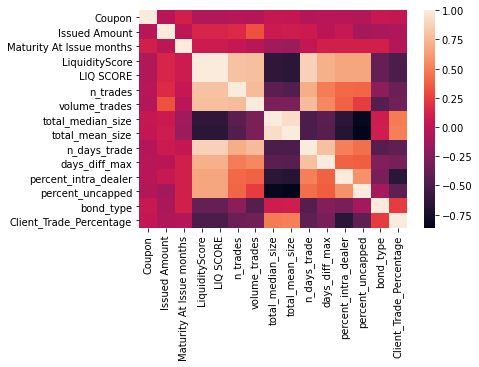

In [8]:
x=df.iloc[:,[9,10,13,15,20,21,22, 23, 24, 25, 26, 27, 28, 29, 30]].corr()
sns.heatmap(x)

It seems like totol_median_size/totol_mean_size has strong correlation with Liquidity score.

# Boxplot

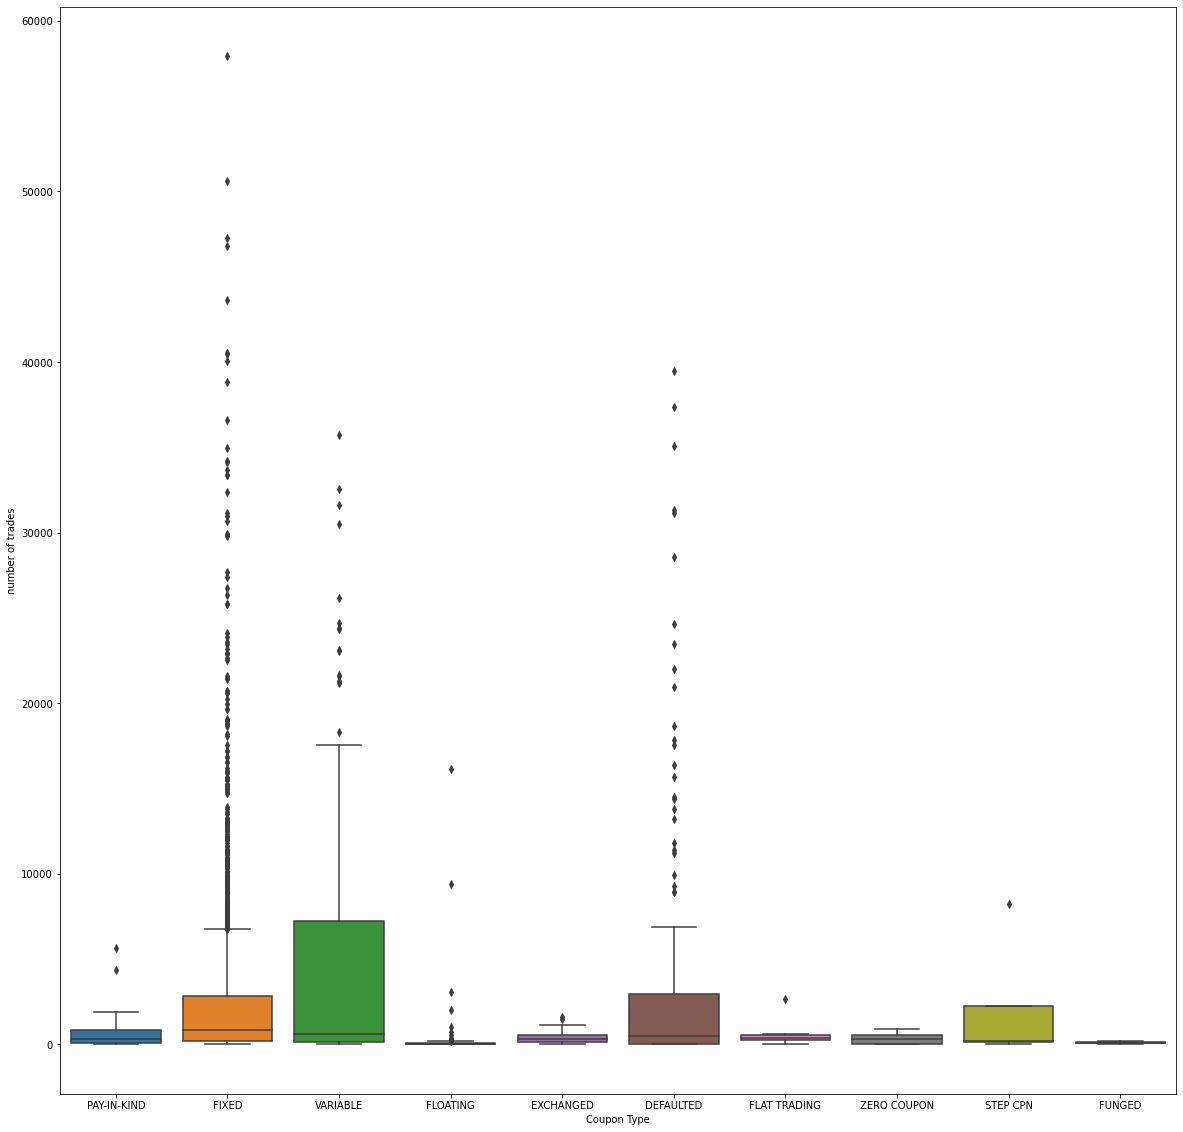

In [9]:
plt.figure(figsize = (20, 20))
_ = sns.boxplot(x='Coupon Type', y='n_trades', data=df)
_ = plt.xlabel('Coupon Type')
_ = plt.ylabel('number of trades')
plt.show()

We can see that FIXED type of Coupon has the biggest spread in the number of trades.

In [10]:
print("My name is Takumi Li")
print("My NetID is: feiyang3")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Takumi Li
My NetID is: feiyang3
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
